In [4]:
import pandas as pd
df = pd.read_csv("c:/data/titanic/data.csv")
df.head()

,survived,sex,age,sibsp,parch,fare,adult_male,alone,pclass_1,pclass_2,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embarked_C,embarked_Q,embarked_S
0,0,1,22.0,1,0,7.2500,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,38.0,1,0,71.2833,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0,1,35.0,0,0,8.0500,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [5]:
train_cols = df.columns[1:]
print(train_cols)
X = df[train_cols] # 독립변수
y = df["survived"] # 종속변수
print(df[train_cols].head())
print(y.head())

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone',
       'pclass_1', 'pclass_2', 'pclass_3', 'deck_A', 'deck_B', 'deck_C',
       'deck_D', 'deck_E', 'deck_F', 'deck_G', 'embarked_C', 'embarked_Q',
       'embarked_S'],
      dtype='object')
   sex   age  sibsp  parch     fare  adult_male  alone  pclass_1  pclass_2  \
0    1  22.0      1      0   7.2500           1      0         0         0   
1    0  38.0      1      0  71.2833           0      0         1         0   
2    0  26.0      0      0   7.9250           0      1         0         0   
3    0  35.0      1      0  53.1000           0      0         1         0   
4    1  35.0      0      0   8.0500           1      1         0         0   

   pclass_3  deck_A  deck_B  deck_C  deck_D  deck_E  deck_F  deck_G  \
0         1       0       0       1       0       0       0       0   
1         0       0       0       1       0       0       0       0   
2         1       0       0       1       0       0     

In [6]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['survived'])
df2=pd.concat([X_samp,y_samp],axis=1)


In [7]:
df2["survived"].value_counts()

0    342
1    342
Name: survived, dtype: int64

In [8]:
X = X_samp[train_cols] # 독립변수
y = y_samp["survived"]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)
X_train.shape, X_test.shape


((547, 20), (137, 20))

<AxesSubplot:>

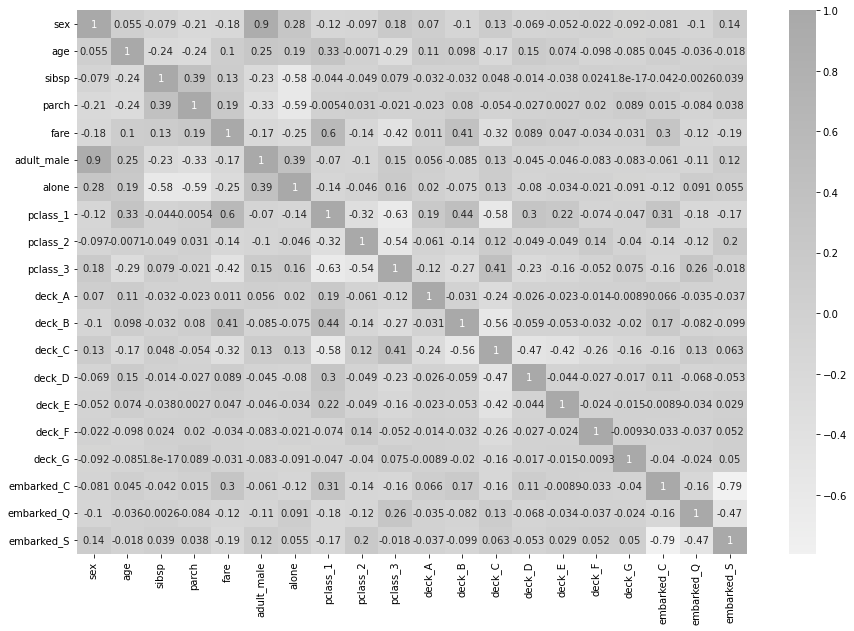

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(X.corr(), annot=True, cmap=cmap)

In [11]:
# 다중공선성이 높은 변수를 제거
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif
# VIF(Variance Inflation Factor) : 다른 변수에 의존적일수록 커진다.

c:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,6.855242,sex
1,1.519595,age
2,1.728773,sibsp
3,1.686382,parch
4,1.882117,fare
5,7.868527,adult_male
6,2.303384,alone
7,inf,pclass_1
8,inf,pclass_2
9,inf,pclass_3


In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
# 변수의coef_ 또는 feature_importances_ 수치가 높은 변수들을 기준으로 선택 (후진제거법)
# 로지스틱 회귀 모형, 의사결정나무 계열의 모형을 사용할 수 있음
rfe = RFE(model, n_features_to_select = 15) # 개수를 지정하지 않으면 변수 개수를 1/2로 감소시킴
fit = rfe.fit(X, y)


In [22]:
print(" 선택된 변수 개수: %d" % fit.n_features_) 
print(" 변수 선택 여부: %s" % fit.support_) 
print(" 변수 랭킹: %s" % fit.ranking_) 
print(' 최종 선택 변수:',X.columns[fit.support_])

 선택된 변수 개수: 15
 변수 선택 여부: [ True False  True  True False  True  True  True False  True  True  True
  True False  True  True  True  True False  True]
 변수 랭킹: [1 4 1 1 6 1 1 1 3 1 1 1 1 5 1 1 1 1 2 1]
 최종 선택 변수: Index(['sex', 'sibsp', 'parch', 'adult_male', 'alone', 'pclass_1', 'pclass_3',
       'deck_A', 'deck_B', 'deck_C', 'deck_E', 'deck_F', 'deck_G',
       'embarked_C', 'embarked_S'],
      dtype='object')


In [14]:
X_train.shape

(547, 20)

In [15]:
#분산이 낮은 변수 제거
# 어떤 특징이 일정하다면 (즉 분산이 0이라면) 의미있는 패턴을 찾기 어렵다
# 아래 자료에서 첫번째 필드는 1개를 제외하고 모두 0(1이 희소함)
X1 = [[0, 0, 1],
[0, 1, 0],
[1, 0, 0],
[0, 1, 1],
[0, 1, 0],
[0, 1, 1]]


In [16]:
from sklearn.feature_selection import VarianceThreshold
#80%이상 0인 필드를 제거
sel = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
sel.fit_transform(X1)
#첫번째 필드가 제거됨
#제거된 필드가 반드시 의미없는 필드라고 단정할 수는 없으므로 주의가 필요함


array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [17]:
# 분산에 의한 선택 (범주형 변수의 경우 대부분 0이고 1이 희소하다면 분류에 도움이 되지 않을 가능성이 높음)
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.8 * (1 - 0.8))
X_train_sel = selector.fit_transform(X_train)
X_test_sel = selector.transform(X_test)
X_train_sel.shape
# 필드가 20개에서 12개로 감소함

(547, 12)

In [18]:
from sklearn.feature_selection import chi2, SelectKBest
# 성능이 좋은 변수 선택 카이제곱 검정 통계값 기준
# 독립변수와 종속변수 간의 관계가 독립이라면 해당 변수는 모델링에 중요하지 않은 변수이므로 제거
# 독립이 아니라면 모델링에 필요한 변수로 채택
selector1 = SelectKBest(chi2, k=15) # 개수를 지정하지 않으면 50%로 감소
X_train1 = selector1.fit_transform(X_train, y_train)
X_test1 = selector1.transform(X_test)


In [19]:
X_train1.shape

(547, 15)

In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
# , 유의한 변수 선택 개수 지정을 하지 않음
RFselector = SelectFromModel(estimator=RandomForestClassifier()).fit(X, y)
GBMselector = SelectFromModel(estimator=GradientBoostingClassifier()).fit(X, y)
LRselector = SelectFromModel(estimator=LogisticRegression(max_iter=1000)).fit(X, y)
columns = X.columns
sel1=columns[RFselector.get_support()]
sel2=columns[LRselector.get_support()]
sel3=columns[GBMselector.get_support()]
print(sel1)
print(sel2)
print(sel3)
print(list(set(sel1) & set(sel2) & set(sel3))) #교집합

Index(['sex', 'age', 'fare', 'adult_male'], dtype='object')
Index(['sex', 'sibsp', 'adult_male', 'pclass_1', 'pclass_3', 'deck_A',
       'deck_C', 'deck_E', 'deck_G'],
      dtype='object')
Index(['age', 'fare', 'adult_male', 'pclass_3'], dtype='object')
['adult_male']
